In [1]:
from PIL import Image,ImageOps
from pandas import  *
from numpy import *
from seaborn import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder

In [2]:
df=read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
x=df.iloc[: , :-1]
y=df.iloc[: , -1]

In [5]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.1)
ls.fit(x,y)

Lasso(alpha=0.1)

In [6]:
names=x.columns
names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [7]:
rng=range(len(names))

Text(0, 0.5, 'LASSO coeff.')

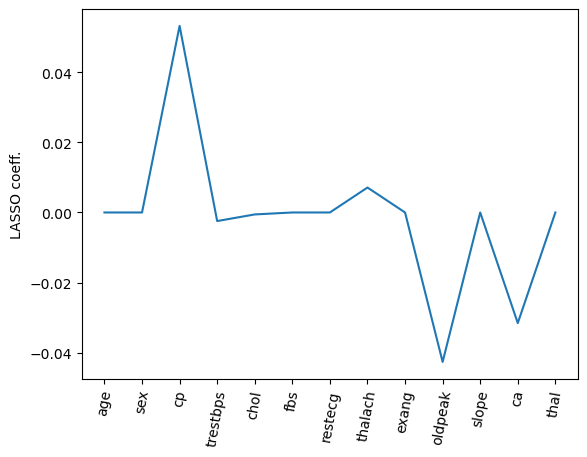

In [8]:
plot(rng,ls.coef_)
xticks(rng,names,rotation=80)
ylabel('LASSO coeff.')

IMP features - cp,oldpeak,ca

In [9]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=334)

In [54]:
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()

In [55]:
l=LogisticRegression()
l.fit(x_train,y_train)

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
l.score(x_train,y_train)          # well it's nearly perfect. NICE WORK !


0.8378048780487805

In [57]:

l.score(x_test,y_test)

0.9463414634146341

In [58]:
l.predict([[50,0,1,130,230,1,2,140,0,2.4,4,0,7]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

Below prediction is wrong by logistic regression, both svm and RF are predicting 0.

In [59]:
l.predict([[40,1,4,130,230,1,2,140,0,2.4,4,0,7]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

S  V  C

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=334)

In [49]:
from sklearn.svm import SVC
s=SVC(kernel='linear')             #  or, SVC()
s.fit(x_train,y_train)

SVC(kernel='linear')

In [50]:
s.score(x_train,y_train)

0.8304878048780487

In [51]:
s.score(x_test,y_test)       

0.9073170731707317

In [52]:
s.predict([[40,1,4,130,230,1,2,140,0,2.4,4,0,7]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

R F

In [60]:
from sklearn.ensemble import RandomForestClassifier
r=RandomForestClassifier(n_estimators=30,random_state=1)
r.fit(x_train,y_train)

RandomForestClassifier(n_estimators=30, random_state=1)

In [61]:
r.score(x_train,y_train)

1.0

In [62]:
r.score(x_test,y_test)

1.0

In [63]:
r.predict([[40,1,4,130,230,1,2,140,0,2.4,4,0,7]])

c:\Users\debna\Downloads\Anaconda33\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

Deep Learning- ANN..........

In [65]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


25 sec down one


In [21]:
'''import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming 'x' and 'y' are defined with your dataset

max_train_accuracy = 0.0  # Initialize maximum training accuracy
best_train_random_state = 0  # Initialize variable to store the random state of the best training accuracy
max_test_accuracy = 0.0  # Initialize maximum testing accuracy
best_test_random_state = 0  # Initialize variable to store the random state of the best testing accuracy

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    l = LogisticRegression()  # Initialize your model here, for example, Logistic Regression
    l.fit(x_train, y_train)   # Train the model
    train_score = l.score(x_train, y_train)  # Calculate accuracy on the training set
    test_score = l.score(x_test, y_test)  # Calculate accuracy on the test set
    
    # Check for the maximum training accuracy
    if train_score > max_train_accuracy:
        max_train_accuracy = train_score
        best_train_random_state = i

    # Check for the maximum testing accuracy
    if test_score > max_test_accuracy:
        max_test_accuracy = test_score
        best_test_random_state = i

print(f"The maximum training accuracy within the range of random states is: {max_train_accuracy} achieved with random state: {best_train_random_state}")
print(f"The maximum testing accuracy within the range of random states is: {max_test_accuracy} achieved with random state: {best_test_random_state}")
'''

'import numpy as np\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LogisticRegression\n\n# Assuming \'x\' and \'y\' are defined with your dataset\n\nmax_train_accuracy = 0.0  # Initialize maximum training accuracy\nbest_train_random_state = 0  # Initialize variable to store the random state of the best training accuracy\nmax_test_accuracy = 0.0  # Initialize maximum testing accuracy\nbest_test_random_state = 0  # Initialize variable to store the random state of the best testing accuracy\n\nfor i in range(1, 1000):\n    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)\n    l = LogisticRegression()  # Initialize your model here, for example, Logistic Regression\n    l.fit(x_train, y_train)   # Train the model\n    train_score = l.score(x_train, y_train)  # Calculate accuracy on the training set\n    test_score = l.score(x_test, y_test)  # Calculate accuracy on the test set\n    \n    # Check for the maximum 

In [22]:
'''from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Assuming 'x' and 'y' are defined with your dataset


max_test_accuracy = 0.0  # Initialize maximum testing accuracy
best_test_random_state = 0  # Initialize variable to store the random state of the best testing accuracy

for i in range (552, 600):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    r=SVC(kernel='linear')
    r.fit(x_train,y_train)  # Train the model
      # Calculate accuracy on the training set
    test_score = r.score(x_test, y_test)  # Calculate accuracy on the test set
    
  
    # Check for the maximum testing accuracy
    if test_score > max_test_accuracy:
        max_test_accuracy = test_score
        best_test_random_state = i


print(f"The maximum testing accuracy within the range of random states is: {max_test_accuracy} achieved with random state: {best_test_random_state}")
'''

KeyboardInterrupt: 